In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Food_Delivery_Time_Prediction.csv")
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [3]:
df.isnull()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["weather_encoder"]=le.fit_transform(df["Weather_Conditions"])
df["traffic_encoder"]=le.fit_transform(df["Traffic_Conditions"])
df["vehicle_encoder"]=le.fit_transform(df["Vehicle_Type"])
df["order_encoder"]=le.fit_transform(df["Order_Priority"])
df["order_encoder1"]=le.fit_transform(df["Order_Time"])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,weather_encoder,traffic_encoder,vehicle_encoder,order_encoder,order_encoder1
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54,1,2,2,2,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02,0,2,2,1,3
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17,2,2,1,0,3
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23,0,1,1,2,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34,1,0,1,1,3


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[["Distance","Delivery_Time"]]=scaler.fit_transform(df[["Distance","Delivery_Time"]])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,weather_encoder,traffic_encoder,vehicle_encoder,order_encoder,order_encoder1
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",0.043068,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,0.105228,1321.10,81.54,1,2,2,2,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",0.853158,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,0.453658,152.21,29.02,0,2,2,1,3
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",0.263741,Snowy,Medium,9,High,Night,Bike,3.3,3.4,0.317886,1644.38,64.17,2,2,1,0,3
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.544299,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,0.923018,541.25,79.23,0,1,1,2,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",0.254307,Rainy,High,6,Low,Night,Bike,3.5,2.8,0.164209,619.81,2.34,1,0,1,1,3


In [38]:

df['Customer_Location'] = df['Customer_Location'].str.replace('[()]', '', regex=True).str.strip()
df['Restaurant_Location'] = df['Restaurant_Location'].str.replace('[()]', '', regex=True).str.strip()


df[['cust_lat', 'cust_lon']] = df['Customer_Location'].str.split(',', expand=True).astype(float)
df[['rest_lat', 'rest_lon']] = df['Restaurant_Location'].str.split(',', expand=True).astype(float)


import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    
    R = 6371.0


    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)


    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))

    distance = R * c
    return distance


df['Distance_km'] = haversine(df['cust_lat'], df['cust_lon'], df['rest_lat'], df['rest_lon'])

df["Distance_km"]=scaler.fit_transform(df[["Distance_km"]])

In [39]:
df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > 0.5 else 0)

In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model=GaussianNB()

X=df[["Distance_km","weather_encoder","traffic_encoder","order_encoder"]]
y=df["Delivery_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)




In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.65
Confusion Matrix:
 [[ 6 11]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.35      0.46        17
           1       0.65      0.87      0.74        23

    accuracy                           0.65        40
   macro avg       0.66      0.61      0.60        40
weighted avg       0.65      0.65      0.62        40



In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

KNN=KNeighborsClassifier(n_neighbors=9)
KNN.fit(X_train,y_train)
y_predict=KNN.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))

Accuracy: 0.7
Confusion Matrix:
 [[11  6]
 [ 6 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65        17
           1       0.74      0.74      0.74        23

    accuracy                           0.70        40
   macro avg       0.69      0.69      0.69        40
weighted avg       0.70      0.70      0.70        40



In [43]:
from sklearn.tree import DecisionTreeClassifier

Decision=DecisionTreeClassifier(max_depth=2, min_samples_split=10, random_state=2)

Decision.fit(X_train,y_train)

y_prediction=Decision.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_prediction))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_prediction))
print("Classification Report:\n", classification_report(y_test, y_prediction))

Accuracy: 0.7
Confusion Matrix:
 [[ 6 11]
 [ 1 22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.35      0.50        17
           1       0.67      0.96      0.79        23

    accuracy                           0.70        40
   macro avg       0.76      0.65      0.64        40
weighted avg       0.75      0.70      0.66        40



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

models = {
    "Naive Bayes": model,
    "KNN (k=9)": KNN,
    "Decision Tree": Decision
}

plt.figure(figsize=(15, 4))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fast', 'Delayed'], yticklabels=['Fast', 'Delayed'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


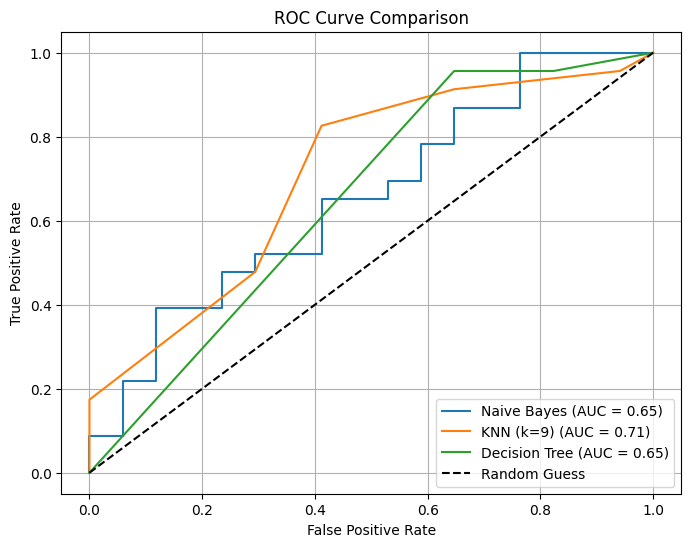

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        auc = roc_auc_score(y_test, y_scores)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
